# this a markdown


In [1181]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt
import math

## Part 1.1

## Import from the csv file

In [1182]:
data = genfromtxt('data1.csv', delimiter=',')

data = np.delete(data,0,0)


## Defining the variables for the normal distribution

In [1183]:
mean1 = np.array([5,5])
mean1 = mean1.reshape((2, 1))

covariance = np.array([ [ 1 , 0 ] , [ 0 , 1 ] ])

mean2 = np.array([2,2])
mean2 = mean2.reshape((2, 1))


### Multiviarient Normal Distribution

In [1184]:
def MultivariateNormalDistribution(mean, covariance, X):
   X = np.asarray(X)
   mean = np.asarray(mean)
   covariance = np.asarray(covariance)
   halfDimention = X.shape[0] / 2
   p1 = 1/((2 * math.pi ) ** halfDimention)* (1 / math.sqrt(np.linalg.det(covariance)))
   p2 =  np.dot( np.transpose((X - mean)) , np.linalg.inv(covariance))
   
   return p1  * np.exp((-1/2) * np.dot(p2 , (X - mean)) )



### Calculating multivarient normal dis for both normal dist and assigning the data to the distribution with higher probability

In [1185]:



FirstDis = np.zeros((data.shape[0],))


for i in range(0, data.shape[0]):
    FirstDis[i] += MultivariateNormalDistribution(mean1,covariance,np.transpose(data[i].reshape((1,2))))
    


SecondDis = np.zeros((data.shape[0],))
for i in range(0, data.shape[0]):
    SecondDis[i] += MultivariateNormalDistribution(mean2,covariance,np.transpose(data[i].reshape((1,2))))
    

FirstDisFinalAnswer = []
DataForDisOne = []
SecondDisFinalAnswer = []
DataForDisTwo = []

for i in range(0, data.shape[0]):
    if(FirstDis[i] > SecondDis[i]):
        DataForDisOne.append(data[i])
        FirstDisFinalAnswer.append(FirstDis[i])
    else:
        DataForDisTwo.append(data[i])
        SecondDisFinalAnswer.append(SecondDis[i])

FirstDisFinalAnswer = np.array(FirstDisFinalAnswer)
DataForDisOne = np.array(DataForDisOne)
SecondDisFinalAnswer = np.array(SecondDisFinalAnswer)
DataForDisTwo = np.array(DataForDisTwo)


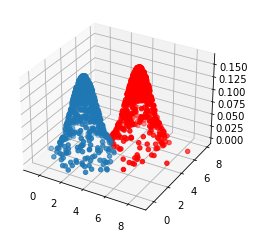

In [1186]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(DataForDisOne[:,0],DataForDisOne[:,1],FirstDisFinalAnswer, c="red")
ax.scatter(DataForDisTwo[:,0],DataForDisTwo[:,1],SecondDisFinalAnswer)

plt.show()

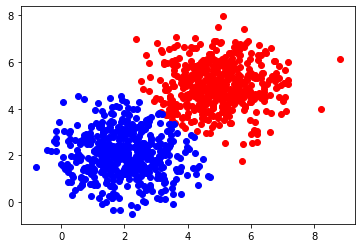

In [1187]:
plt.plot(DataForDisOne[:,0],DataForDisOne[:,1], 'ro')
plt.plot(DataForDisTwo[:,0],DataForDisTwo[:,1], 'bo')
plt.show()

## Part 1.2

## Liklihood Function

In [1188]:
def Likelihood(mean, covariance, X):
    
    Normal = []
    for i in range(0, X.shape[0]):
        Normal.append( MultivariateNormalDistribution(mean,covariance,np.transpose(X[i].reshape((1,2)))))
    
    return np.prod(Normal)

## Log of Likelihood

In [1189]:
def LogLikelihood(mean, covariance, X):
    
    Normal = []
    for i in range(0, X.shape[0]):
        Normal.append( np.log( MultivariateNormalDistribution(mean,covariance,np.transpose(X[i].reshape((1,2))))))
    
    return np.sum(Normal)

## The answer of part 1.2

In [1190]:

ans = LogLikelihood(mean2,covariance,data)
print("First Distribution")
print("The likelihood: " , Likelihood(mean1,covariance,data))
print("Log of the Likelihood: " ,  LogLikelihood(mean1,covariance,data))

print("")
print("------------------------------------------------")
print("")

print("Second Distribution")
print("The likelihood: " ,  Likelihood(mean2,covariance,data))
print("Log of the Likelihood: " ,  LogLikelihood(mean2,covariance,data))

First Distribution
The likelihood:  0.0
Log of the Likelihood:  -7254.811516924357

------------------------------------------------

Second Distribution
The likelihood:  0.0
Log of the Likelihood:  -7239.434376472873


## Part 2

In [1191]:
insuranceData = genfromtxt('insurance.csv', delimiter=',')

insuranceData = np.delete(insuranceData,(0), axis=0)





In [1192]:
def hypotheses(teta , features):
    teta = np.array(teta)
    features = np.array(features)
    
    return np.transpose(teta) @ features


In [1193]:
def CostFunction(data,teta):

    M = data.shape[0]
    N = data.shape[1]

    data = np.c_[np.ones(M) , data]

    X = data[:, :-1]
    Y = data[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    return (1/ (2*M)) * (e.transpose() @ e)

In [1194]:
def OneIterationGradientDescent(data,teta,learningRate):
    
    M = data.shape[0]
    N = data.shape[1]

    data = np.c_[np.ones(M) , data]

    X = data[:, :-1]
    Y = data[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    
    Derivative = (1 / M) * (X.transpose() @ (e))
    #Derivative = (1/X.shape[0])*(X.T@(X@teta-Y)
    
    teta = teta - (learningRate * (Derivative))
    



    return teta, (1/ (2*M)) * (e.transpose() @ e)

In [1195]:
def BatchGradientDescent(data,teta,learningRate,iterationCount): 
    
    Error = np.zeros([2,iterationCount])

    for i in range(iterationCount):
        Error[1,i] = i
        teta, Error[0,i] = OneIterationGradientDescent(data,teta,learningRate)
        #print( Error[0,i] )
        

    #Zprint(Error)
    return teta , Error


In [1196]:
def MiniBatchGradienDescent(data,teta,learningRate,iterationCount, batchSizes ):
    M = data.shape[0]

    
    if(M < batchSizes):
        return BatchGradientDescent(data,teta,learningRate,iterationCount)

    Error = np.zeros((2,iterationCount))


    for j in range(iterationCount):
        np.random.shuffle(data)
        Error[1,j] = j
        
        Error[0,j] = CostFunction(data,teta)
        teta,temp = OneIterationGradientDescent(data[0:batchSizes,],teta,learningRate)
        
    return teta,Error
    


In [1197]:
def StochasticGradientDescent(data,teta,learningRate,iterationCount):
    return MiniBatchGradienDescent(data,teta,learningRate,iterationCount,1)

In [1198]:
iterationCount = 50
learningRate = 0.0001
import random
GD_teta = np.zeros([insuranceData.shape[1],1])
GD_Error = np.zeros((2,iterationCount))

GD_teta , GD_Error = BatchGradientDescent(insuranceData,GD_teta,learningRate,iterationCount)


MBGD_teta = np.zeros([insuranceData.shape[1],1])
MBGD_Error = np.zeros((2,iterationCount))

MBGD_teta , MBGD_Error = MiniBatchGradienDescent(insuranceData,MBGD_teta,learningRate,iterationCount,32)


SGD_teta = np.zeros([insuranceData.shape[1],1])
SGD_Error = np.zeros((2,iterationCount))




SGD_teta , SGD_Error = StochasticGradientDescent(insuranceData,SGD_teta,learningRate,iterationCount)



In [1199]:
f = [1,23,34.4,0]
print(hypotheses(GD_teta,f))

#print(Error)

[10589.10137897]


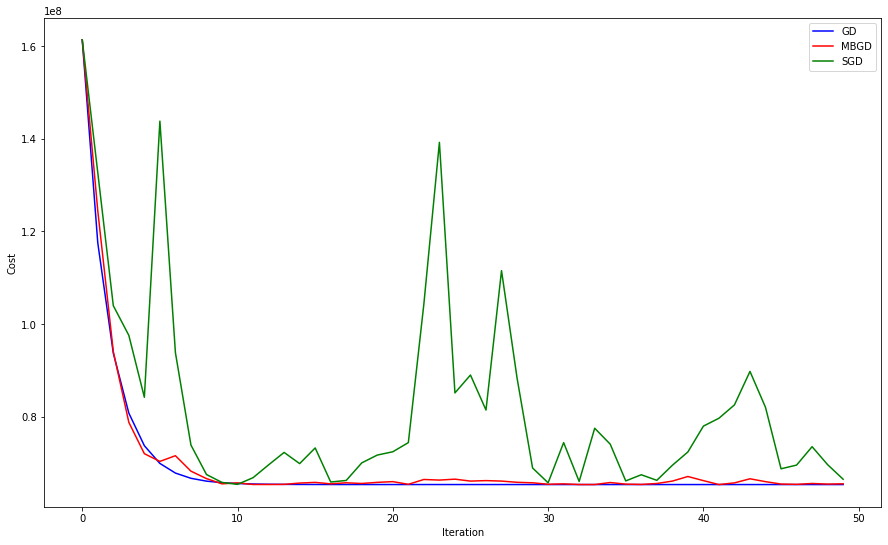

In [1200]:
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.plot(GD_Error[1], GD_Error[0], 'b-')
plt.plot(MBGD_Error[1], MBGD_Error[0], 'r-')
plt.plot(SGD_Error[1], SGD_Error[0], 'g-')

plt.gcf().set_size_inches(15, 9)
plt.legend(['GD', 'MBGD', 'SGD'])



plt.show()

## 